# Equirectangular Transforms with EquiForge

This notebook demonstrates how to use the EquiForge package to convert between perspective and equirectangular image formats.

## Installation

Before running this notebook, make sure you have the `equiforge` package installed:

In [1]:
# Install equiforge if needed
# Uncomment and run this cell if you haven't installed equiforge yet

# %pip install equiforge

## Perspective to Equirectangular Conversion

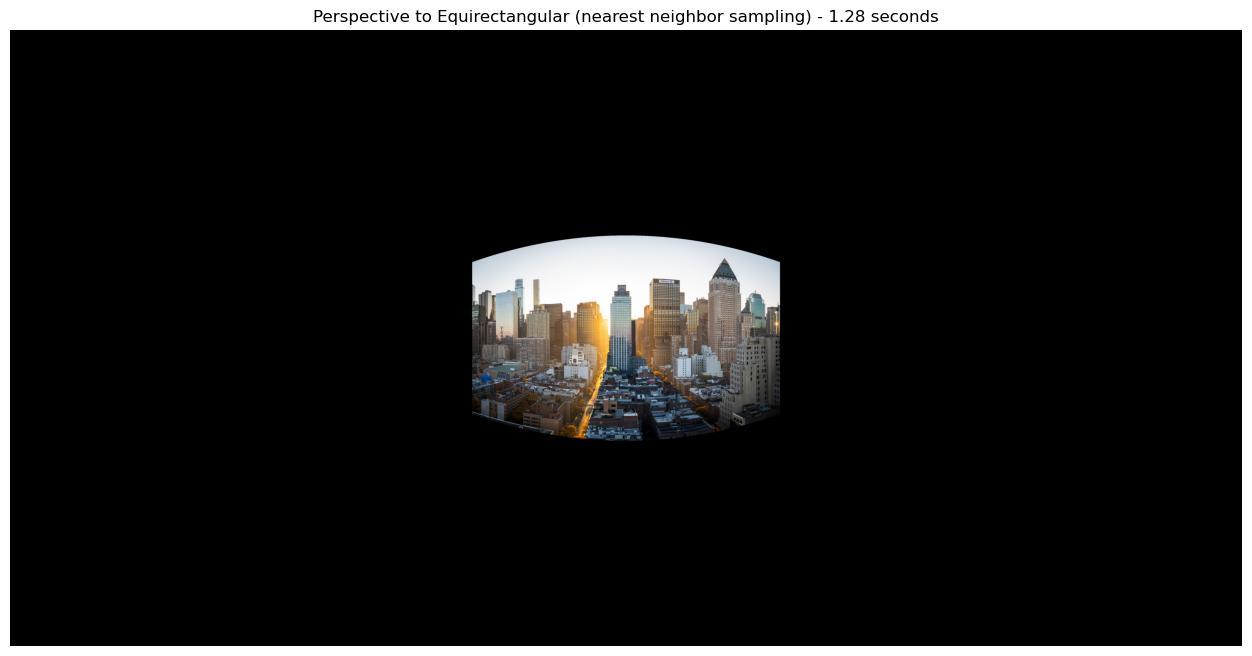

In [2]:
import time
import matplotlib.pyplot as plt

from equiforge import pers2equi

"""
Convert perspective image to equirectangular projection

Parameters:
- img: Input perspective image (numpy array or file path)
- output_height: Height of output equirectangular image (width is automatically calculated to match a 2:1 aspect ratio)
- fov_x: Horizontal field of view in degrees
- yaw: Rotation around vertical axis (left/right) in degrees
- pitch: Rotation around horizontal axis (up/down) in degrees
- roll: Rotation around depth axis (clockwise/counterclockwise) in degrees
- use_gpu: Whether to use GPU acceleration if available
- sampling_method: Sampling method for pixel interpolation ("nearest" or "bilinear")
- log_level: Optional override for log level during this conversion

Returns:
- Equirectangular image as numpy array
"""

pers_in = "Images/pers_1.jpg"  # Or load your own: np.array(Image.open('path/to/equirect.jpg'))

start_time = time.time()

# Convert the perspective image to equirectangular format using default nearest neighbor sampling
equi_out = pers2equi(
    pers_in,
    output_height=4096,    # default: 512
    fov_x=90.0,            # default: 90.0
    yaw=0.0,               # default: 0.0
    pitch=0.0,             # default: 0.0
    roll=0.0,              # default: 0.0
    use_gpu=True,          # default: True
    sampling_method="nearest", # default: "nearest"
    log_level="SILENT"     # default: "SILENT"
)

end_time = time.time()

# Display the result
plt.figure(figsize=(16, 8))
plt.imshow(equi_out)
plt.title(f"Perspective to Equirectangular (nearest neighbor sampling) - {end_time - start_time:.2f} seconds")
plt.axis('off')
plt.show()

### Comparison of Sampling Methods

Let's compare the results of different sampling methods (nearest neighbor vs bilinear interpolation):

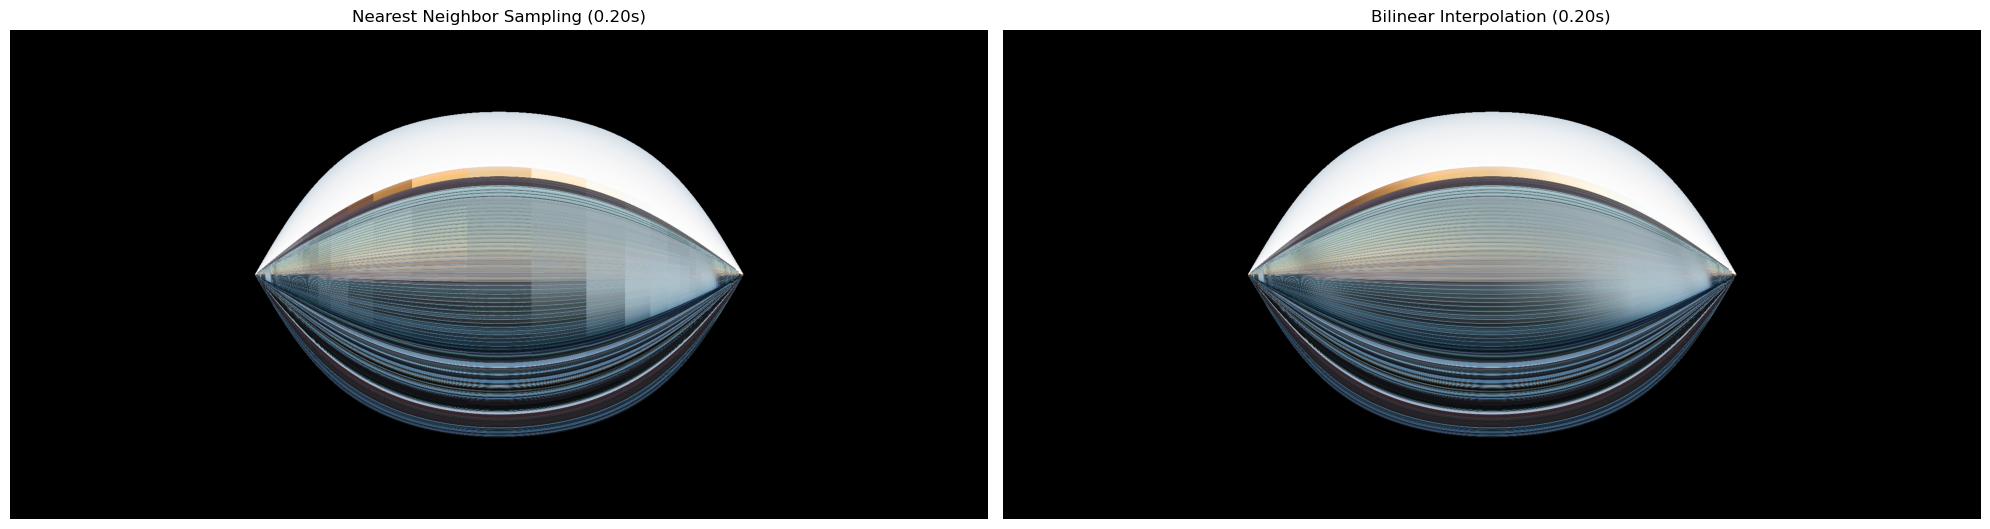

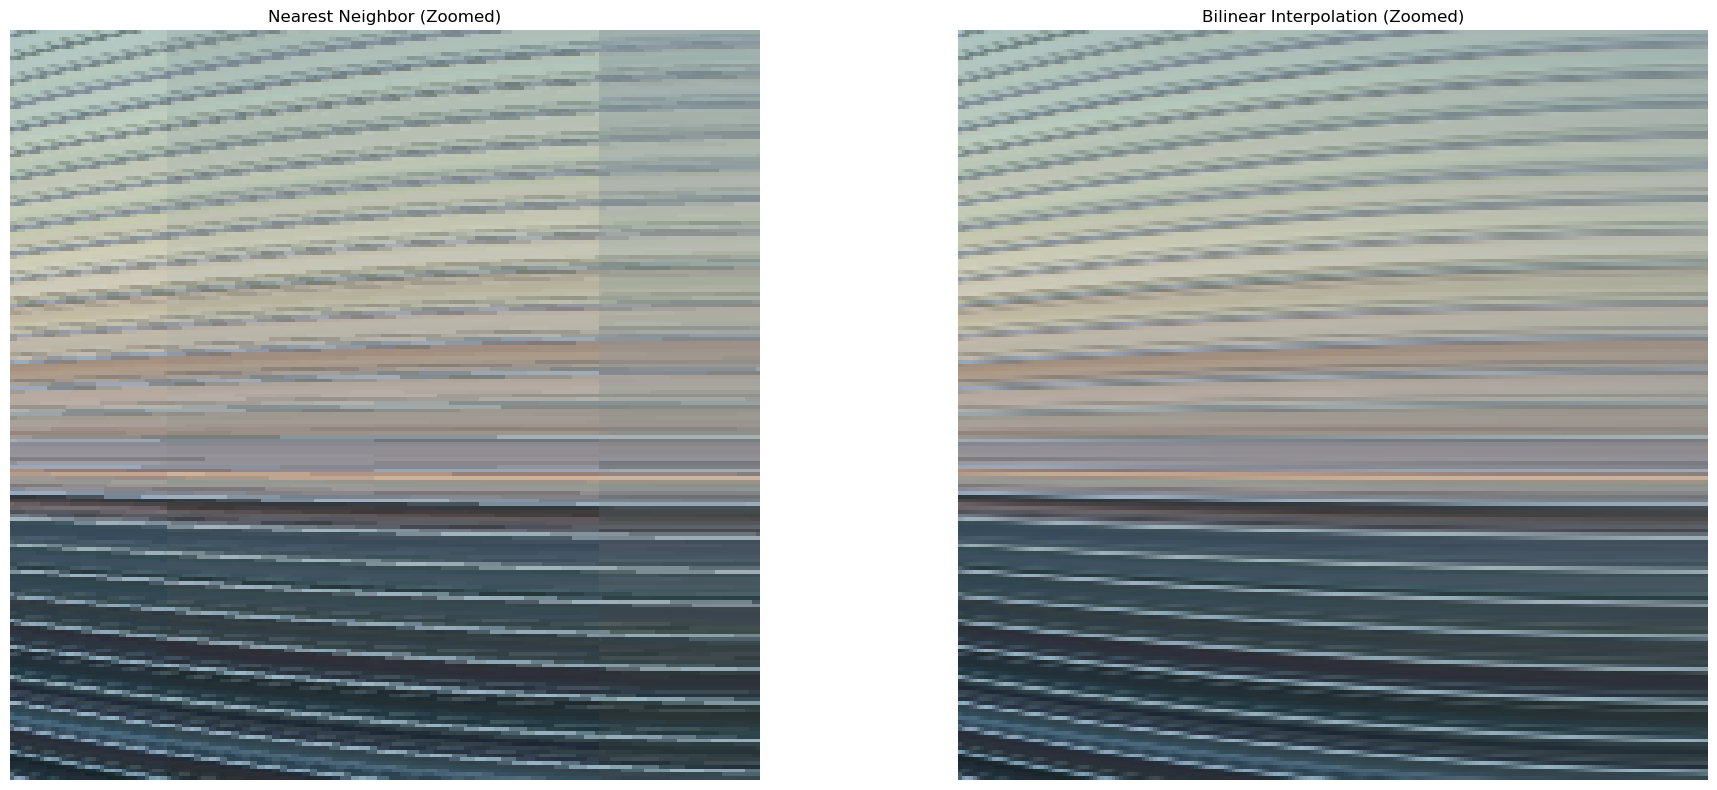

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Convert using nearest neighbor sampling (default)
start_time = time.time()
equi_nearest = pers2equi(
    pers_in,
    output_height=1024,
    fov_x=180.0,
    sampling_method="nearest",
    log_level="SILENT"
)
nearest_time = time.time() - start_time

# Convert using bilinear sampling
start_time = time.time()
equi_bilinear = pers2equi(
    pers_in,
    output_height=1024,
    fov_x=180.0,
    sampling_method="bilinear",
    log_level="SILENT"
)
bilinear_time = time.time() - start_time

# Display comparison
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

axes[0].imshow(equi_nearest)
axes[0].set_title(f"Nearest Neighbor Sampling ({nearest_time:.2f}s)")
axes[0].axis('off')

axes[1].imshow(equi_bilinear)
axes[1].set_title(f"Bilinear Interpolation ({bilinear_time:.2f}s)")
axes[1].axis('off')

plt.tight_layout()
plt.show()

# Show zoomed in comparison of a section to better see the differences
y_start, x_start = 400, 800
crop_size = 200

fig, axes = plt.subplots(1, 2, figsize=(20, 8))

axes[0].imshow(equi_nearest[y_start:y_start+crop_size, x_start:x_start+crop_size])
axes[0].set_title("Nearest Neighbor (Zoomed)")
axes[0].axis('off')

axes[1].imshow(equi_bilinear[y_start:y_start+crop_size, x_start:x_start+crop_size])
axes[1].set_title("Bilinear Interpolation (Zoomed)")
axes[1].axis('off')

plt.tight_layout()
plt.show()

## Equirectangular to Perspective Conversion

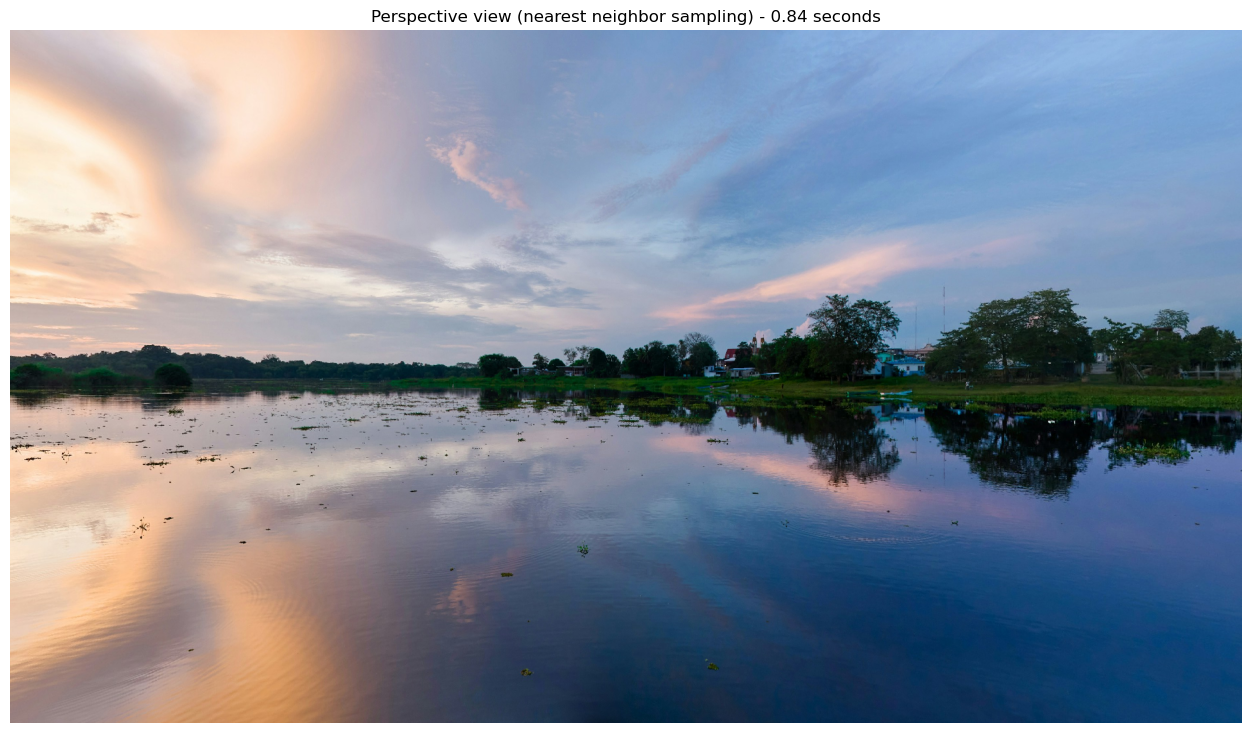

In [4]:
import time
import matplotlib.pyplot as plt

from equiforge import equi2pers

"""
Convert equirectangular image to perspective projection

Parameters:
- img: Input equirectangular image (numpy array or file path)
- output_width: Width of output perspective image
- output_height: Height of output perspective image
- fov_x: Horizontal field of view in degrees
- yaw: Rotation around vertical axis (left/right) in degrees
- pitch: Rotation around horizontal axis (up/down) in degrees
- roll: Rotation around depth axis (clockwise/counterclockwise) in degrees
- use_gpu: Whether to use GPU acceleration if available
- sampling_method: Sampling method for pixel interpolation ("nearest" or "bilinear")
- log_level: Optional override for log level during this conversion

Returns:
- Perspective image as numpy array
"""

equi_in = "Images/equi_3.jpg"  # Or load your own: np.array(Image.open('path/to/equirect.jpg'))

start_time = time.time()

# Convert back to perspective from desired viewing direction
pers_out = equi2pers(
    equi_in,
    output_width=1920,     # no default (required)
    output_height=1080,    # no default (required)
    fov_x=90.0,            # default: 90.0
    yaw=0.0,               # default: 0.0
    pitch=0.0,             # default: 0.0
    roll=0.0,              # default: 0.0
    use_gpu=True,          # default: True
    sampling_method="nearest", # default: "nearest"
    log_level="SILENT"     # default: "SILENT"
)

end_time = time.time()

# Display the result
plt.figure(figsize=(16, 9))
plt.imshow(pers_out)
plt.title(f"Perspective view (nearest neighbor sampling) - {end_time - start_time:.2f} seconds")
plt.axis('off')
plt.show()

### Comparison of Sampling Methods for Equirectangular to Perspective

Let's compare the different sampling methods for equi2pers conversion as well:

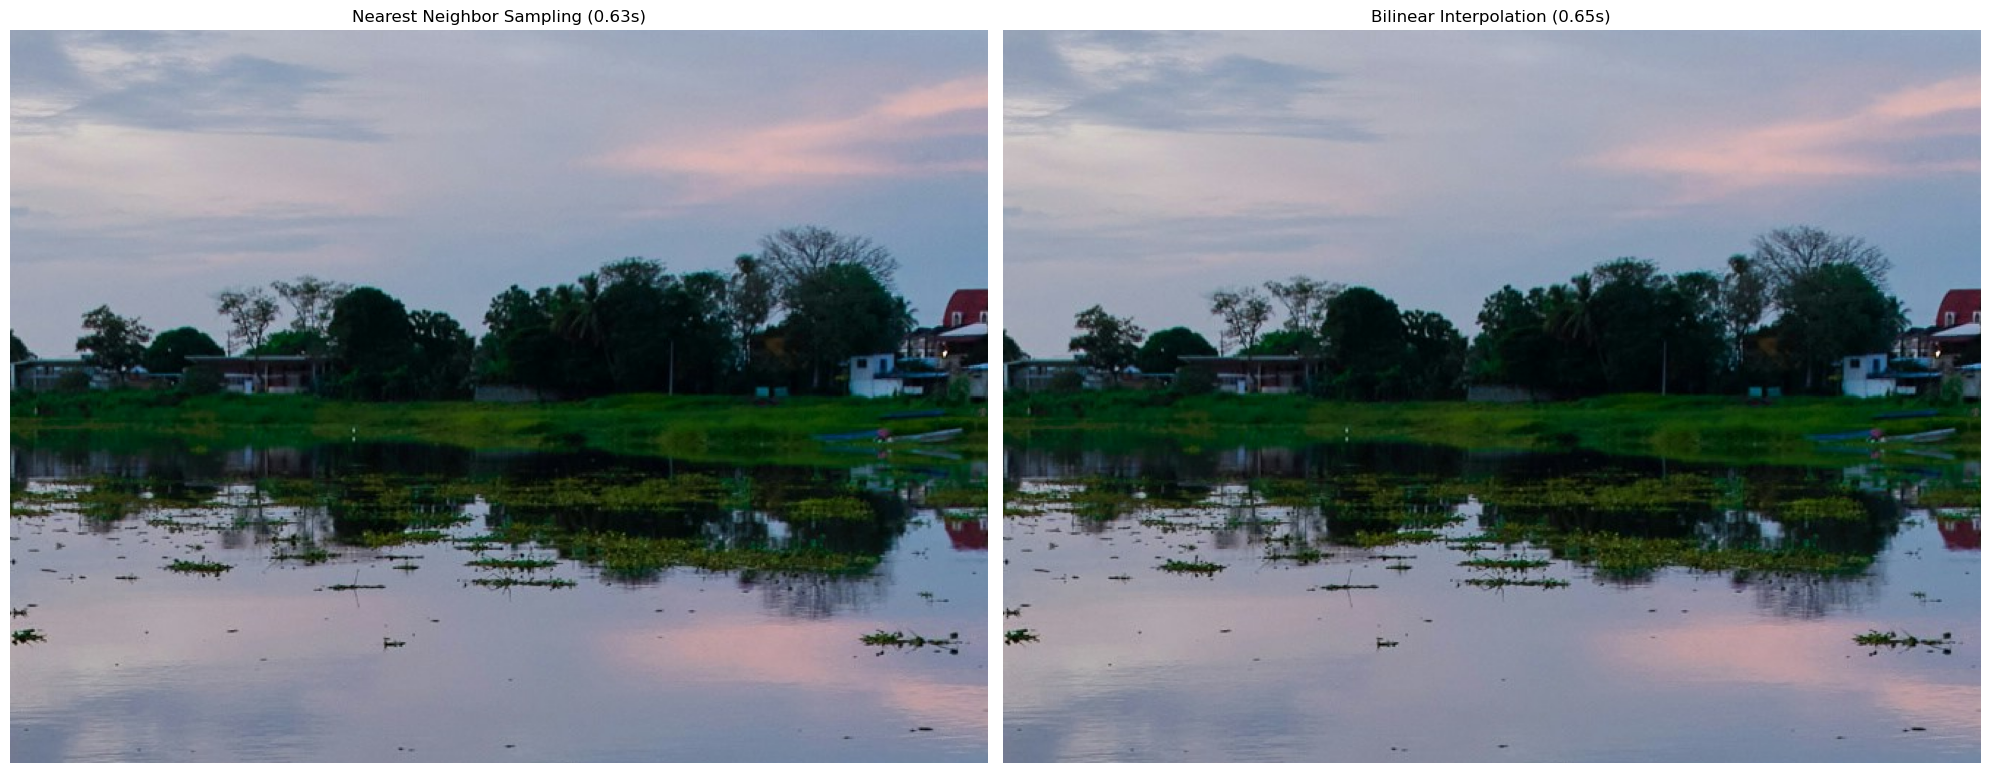

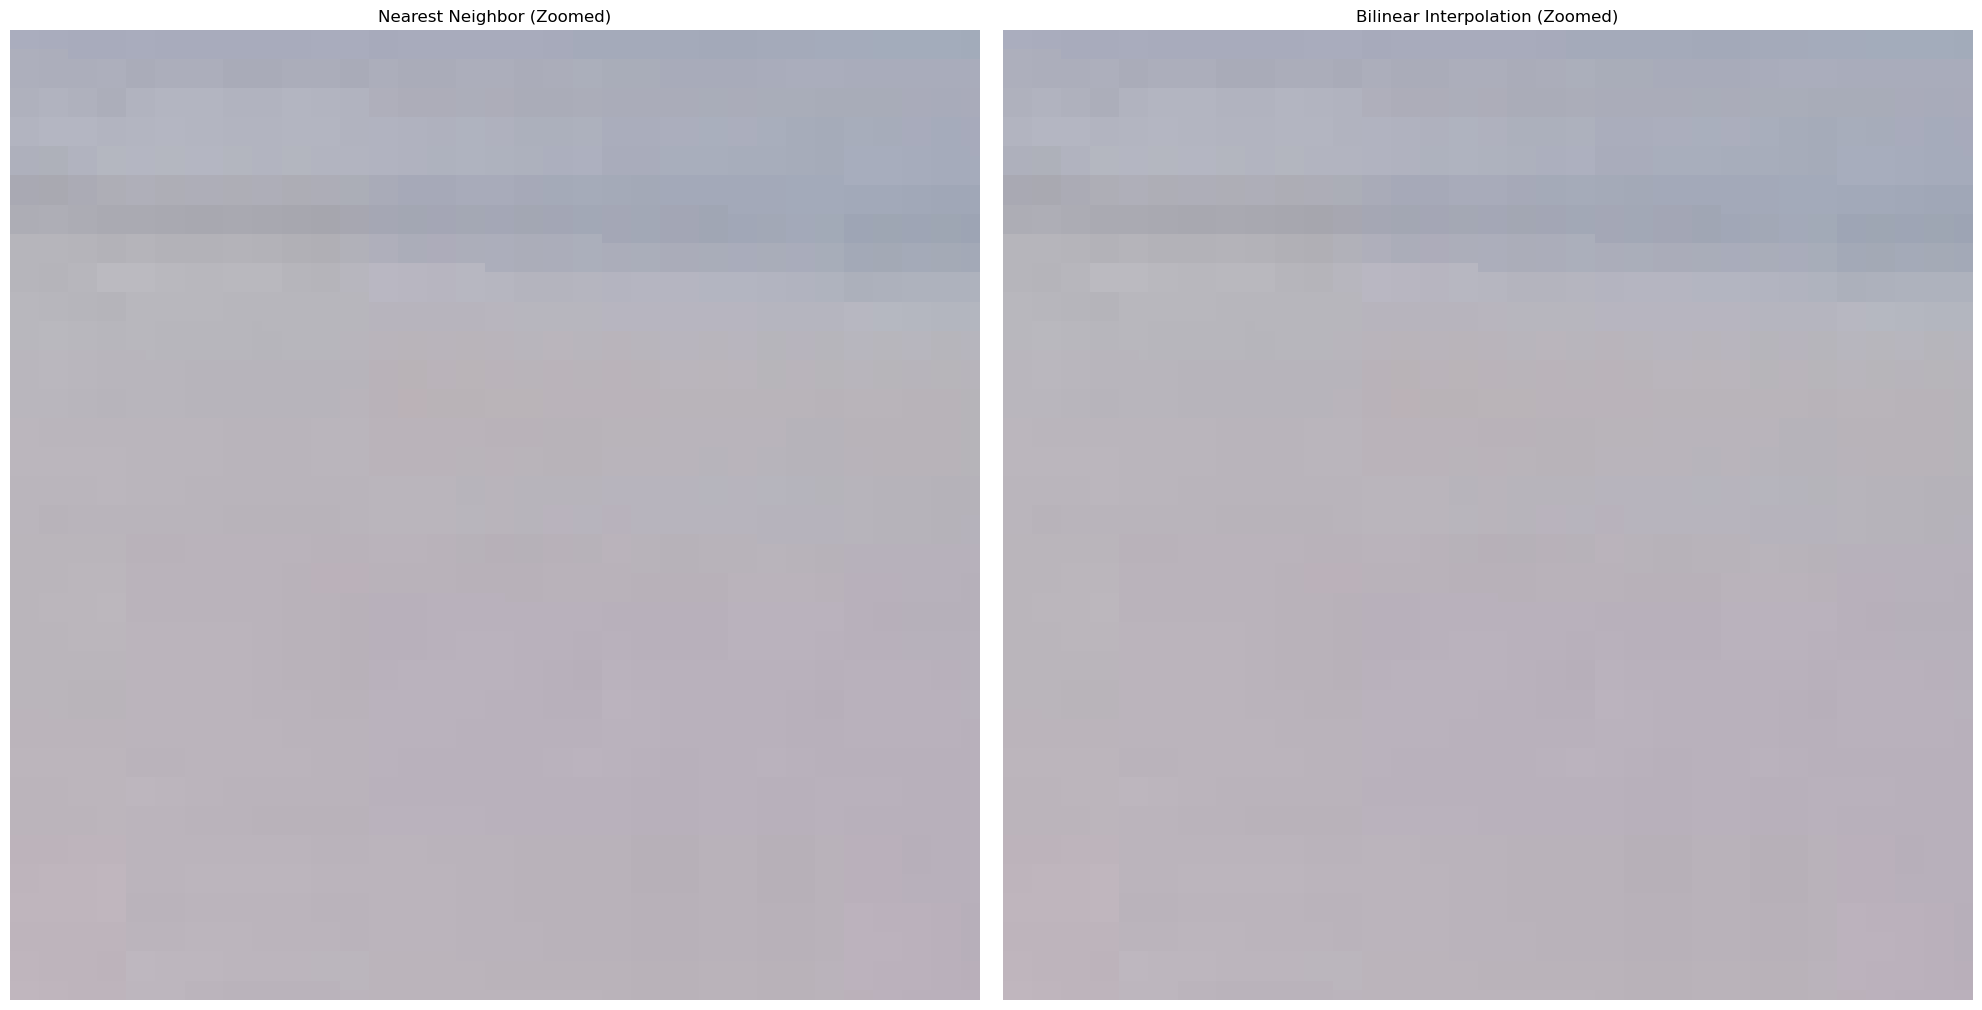

In [5]:
# Convert using nearest neighbor sampling
start_time = time.time()
pers_nearest = equi2pers(
    equi_in,
    output_width=1024*2,
    output_height=768*2,
    fov_x=20.0,
    sampling_method="nearest",
    log_level="SILENT"
)
nearest_time = time.time() - start_time

# Convert using bilinear sampling
start_time = time.time()
pers_bilinear = equi2pers(
    equi_in,
    output_width=1024*2,
    output_height=768*2,
    fov_x=20.0,
    sampling_method="bilinear",
    log_level="SILENT"
)
bilinear_time = time.time() - start_time

# Display comparison
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

axes[0].imshow(pers_nearest)
axes[0].set_title(f"Nearest Neighbor Sampling ({nearest_time:.2f}s)")
axes[0].axis('off')

axes[1].imshow(pers_bilinear)
axes[1].set_title(f"Bilinear Interpolation ({bilinear_time:.2f}s)")
axes[1].axis('off')

plt.tight_layout()
plt.show()

# Show zoomed in comparison of a section to better see the differences
y_start, x_start = 200, 500
crop_size = 100

fig, axes = plt.subplots(1, 2, figsize=(20, 10))

axes[0].imshow(pers_nearest[y_start:y_start+crop_size, x_start:x_start+crop_size])
axes[0].set_title("Nearest Neighbor (Zoomed)")
axes[0].axis('off')

axes[1].imshow(pers_bilinear[y_start:y_start+crop_size, x_start:x_start+crop_size])
axes[1].set_title("Bilinear Interpolation (Zoomed)")
axes[1].axis('off')

plt.tight_layout()
plt.show()

## Performance Benchmark

Let's compare the performance of different sampling methods with CPU vs GPU:

In [6]:
import pandas as pd
import time

# Sample image paths
pers_image = "Images/pers_1.jpg"
equi_image = "Images/equi_3.jpg"

# Set up test configurations
test_configs = [
    {"name": "pers2equi - CPU Nearest", "fn": pers2equi, "img": pers_image, "use_gpu": False, "method": "nearest", "height": 1024},
    {"name": "pers2equi - CPU Bilinear", "fn": pers2equi, "img": pers_image, "use_gpu": False, "method": "bilinear", "height": 1024},
    {"name": "pers2equi - GPU Nearest", "fn": pers2equi, "img": pers_image, "use_gpu": True, "method": "nearest", "height": 1024},
    {"name": "pers2equi - GPU Bilinear", "fn": pers2equi, "img": pers_image, "use_gpu": True, "method": "bilinear", "height": 1024},
    {"name": "equi2pers - CPU Nearest", "fn": equi2pers, "img": equi_image, "use_gpu": False, "method": "nearest", "width": 1024, "height": 768},
    {"name": "equi2pers - CPU Bilinear", "fn": equi2pers, "img": equi_image, "use_gpu": False, "method": "bilinear", "width": 1024, "height": 768},
    {"name": "equi2pers - GPU Nearest", "fn": equi2pers, "img": equi_image, "use_gpu": True, "method": "nearest", "width": 1024, "height": 768},
    {"name": "equi2pers - GPU Bilinear", "fn": equi2pers, "img": equi_image, "use_gpu": True, "method": "bilinear", "width": 1024, "height": 768}
]

# Run benchmarks
results = []

for config in test_configs:
    try:
        start_time = time.time()
        if 'width' in config:  # equi2pers needs width
            _ = config['fn'](config['img'], output_width=config['width'], output_height=config['height'], 
                           use_gpu=config['use_gpu'], sampling_method=config['method'], log_level="SILENT")
        else:  # pers2equi only needs height
            _ = config['fn'](config['img'], output_height=config['height'], 
                           use_gpu=config['use_gpu'], sampling_method=config['method'], log_level="SILENT")
        elapsed = time.time() - start_time
        results.append({"Test": config['name'], "Time (s)": elapsed})
    except Exception as e:
        results.append({"Test": config['name'], "Time (s)": "Error: " + str(e)})

# Display results
df = pd.DataFrame(results)
display(df)

# Create a bar chart of the results
numeric_results = [r for r in results if isinstance(r["Time (s)"] , (int, float))]
if numeric_results:
    df_numeric = pd.DataFrame(numeric_results)
    ax = df_numeric.plot(x="Test", y="Time (s)", kind="bar", figsize=(12, 6))
    ax.set_ylabel("Time (seconds)")
    ax.set_title("Performance Comparison of Different Sampling Methods")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

ModuleNotFoundError: No module named 'pandas'